In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import json
import geopandas as gpd
from copy import deepcopy
import shapely
from shapely.geometry import Point,Polygon,LineString
import pyproj

### map of the 50 metro areas

In [79]:
# shape file for US metro areas
fullmap = gpd.read_file("../data/shapes/tl_2019_us_cbsa/tl_2019_us_cbsa.shp")

In [80]:
# manipulations
fullmap.set_geometry("geometry",inplace=True)

fullmap["GEOID"] = fullmap["GEOID"].astype(int)

In [82]:
# cbsa info table
cbsa_info = pd.read_csv("../data/cbsacode_shortname_tracts.csv", sep=";", index_col=0)

In [83]:
# manipulations
cbsa_info = cbsa_info.loc[:,["cbsacode", "short_name"]].drop_duplicates()
cbsa_info["selected"] = 1
cbsa_info["color"] = "green"

In [84]:
# merge for plot
fullmap = pd.merge(fullmap, cbsa_info, left_on="GEOID", right_on="cbsacode", how="left")

In [85]:
# correction on the final dataframe
fullmap["selected"] = fullmap["selected"].fillna(0)
fullmap["color"] = fullmap["color"].fillna("white")

/usr/local/lib/python3.8/site-packages/geopandas/plotting.py:572: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


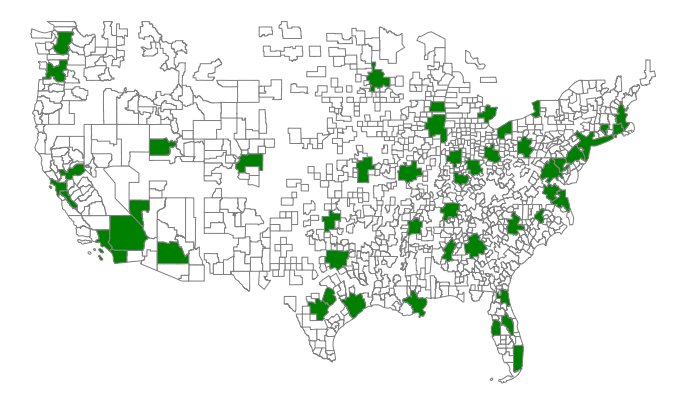

In [88]:
# map creation
fig, ax = plt.subplots(figsize = (12,12))

fullmap.plot(ax=ax, column="selected", color=fullmap["color"], edgecolor='gray')
plt.xlim([-127,-66])
plt.ylim([24,50])
plt.axis('off')
plt.show()
# plt.savefig("../fig/map_50metros.png", dpi=600, bbox_inches='tight')